# 準備

# import

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster._kmeans
from itertools import combinations

# 関数の定義

In [10]:
#コサイン類似度
def cos_sim(X, Y):
    return np.dot(X, Y)/(np.linalg.norm(X)*np.linalg.norm(Y))
    
#コサイン類似度の非類似度化
def cos_sim_distances(X, Y):
    return 1-cos_sim(X, Y)

def sub_cos_sim_distances(X, row_index_1, row_index_2):
    cossim_distance = cos_sim_distances(X[row_index_1], X[row_index_2])
    return (cossim_distance, row_index_1, row_index_2)

def middle_cos_sim_distances(X, Y=None):
    if Y is None:
        #Xだけが入力されていて、Xが2d-arrayの場合
        row_combinations = list(combinations(range(0, len(X)), 2))
        cos_sim_set = [sub_cos_sim_distances(X, index_set_tuple[0], index_set_tuple[1]) for index_set_tuple in row_combinations]
        return np.array(cos_sim_set)
    
    #不明なため一旦中断
    
    elif len(X.shape)==1 and len(Y.shape)==2:
        cos_sim_set = np.array([cos_sim_distances(X, Y[y_sample_index]) for y_sample_index in range(0, Y.shape[0])])
        return np.array(cos_sim_set)
    
    elif  len(X.shape)==2 and len(Y.shape)==2:
        cos_sim_x_and_all_y = lambda XX, YY: np.array([cos_sim_distances(XX, YY[y_sample_index]) for y_sample_index in range(0, YY.shape[0])])
        cos_sim_divergence_set = np.array([cos_sim_x_and_all_y(X[x_i], Y) for x_i in range(0, X.shape[0])])
        return np.array(cos_sim_divergence_set)
    
    else:
        raise Exception("Exception case caused")

def middle_cos_sim_distances(X, Y=None):
    if Y is None:
        #Xだけが入力されていて、Xが2d-arrayの場合
        row_combinations = list(combinations(range(0, len(X)), 2))
        cos_sim_set = [sub_cos_sim_distances(X, index_set_tuple[0], index_set_tuple[1]) for index_set_tuple in row_combinations]

        data = [t[0] for t in cos_sim_set]
        row = [t[1] for t in cos_sim_set]
        col = [t[2] for t in cos_sim_set]

        distance_matrix = np.zeros((X.shape[0], X.shape[0]))
        distance_matrix[row, col] = data
        return distance_matrix+distance_matrix.T
    
    #不明なため一旦中断
    
    elif len(X.shape)==1 and len(Y.shape)==2:
        cos_sim_set = np.array([cos_sim_distances(X, Y[y_sample_index]) for y_sample_index in range(0, Y.shape[0])])
        return np.array(cos_sim_set)
    
    elif  len(X.shape)==2 and len(Y.shape)==2:
        cos_sim_x_and_all_y = lambda XX, YY: np.array([cos_sim_distances(XX, YY[y_sample_index]) for y_sample_index in range(0, YY.shape[0])])
        cos_sim_divergence_set = np.array([cos_sim_x_and_all_y(X[x_i], Y) for x_i in range(0, X.shape[0])])
        return np.array(cos_sim_divergence_set)
    
    else:
        raise Exception("Exception case caused")
        
#k_meansの距離に定義を合わせる
def new_cos_sim_distances(X, Y=None, Y_norm_squared=None, squared=False):
    return middle_cos_sim_distances(X, Y)

# 乱数の発生

In [11]:
#乱数の生成
np.random.seed(0)
x1 = np.array([np.random.normal(loc, 1, 20) for loc in [2, 10, -2]]).flatten() #ランダムな80個の数を生成
x2 = np.array([np.random.normal(loc, 1, 20) for loc in [0, 10, 0]]).flatten() #ランダムな80個の数を生成

#入力データ
X = np.c_[x1, x2]

No handles with labels found to put in legend.


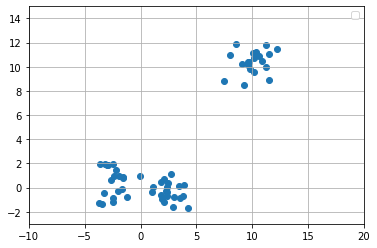

In [12]:
#散布図で表示
plt.rcParams["font.family"] = "Hiragino Kaku Gothic Pro"
plt.scatter(x1, x2)
plt.xlim(-10, 20)
plt.ylim(-3, 15)
plt.legend()
plt.grid()
plt.show()

## コサイン類似度でk-meansを実行

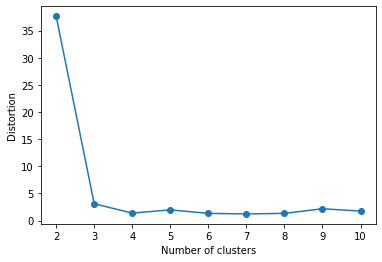

In [13]:
#距離を上書き
sklearn.cluster._kmeans.euclidean_distances = new_cos_sim_distances

#エルボー法を用いてクラスタ数を決定する
distortions_cos_sim = []

for i  in range(2,11):                # 1~10クラスタまで一気に計算 
    km_model_cos_sim = sklearn.cluster._kmeans.KMeans(    
        n_clusters=i,
        init='k-means++',     # k-means++法によりクラスタ中心を選択
        n_init=10,
        max_iter=300,
        random_state=0)
    y_km_cos_sim = km_model_cos_sim.fit(X)  # クラスタリングの計算を実行
    
    #郡内分散を計算してそれをエルボー法で実装
    result_cos_sim = np.c_[X, y_km_cos_sim.labels_]
    distortions_cos_sim.append(sum([sum([cos_sim_distances(col, y_km_cos_sim.cluster_centers_[j]) for col in result_cos_sim[result_cos_sim[:,2] == j][:, 0:2]]) for j in set(y_km_cos_sim.labels_)]))

plt.plot(range(2,11),distortions_cos_sim,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
distortions_cos_sim

[37.64713328407146,
 3.099553266551365,
 1.3755560663727202,
 1.9724926541573757,
 1.3256376985020082,
 1.2266161285061927,
 1.3264245226297238,
 2.1755126560164277,
 1.749032938124335]

In [15]:
center_half_distances

NameError: name 'center_half_distances' is not defined

No handles with labels found to put in legend.


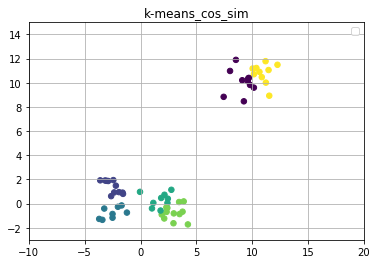

In [23]:
#kmeansを実装
km_model_cos_sim = sklearn.cluster._kmeans.KMeans(
    n_clusters = 6,
    init = "random",
    n_init = 10,
    max_iter = 300,
    tol = 1e-04,
    random_state = 1,
    )

#モデルへのあてはめ
y_km_cos_sim = km_model_cos_sim.fit(X)

#結果をプロット
plt.rcParams["font.family"] = "Hiragino Kaku Gothic Pro"
plt.scatter(x1, x2, c = y_km_cos_sim.labels_, s = 30)
plt.xlim(-10, 20)
plt.ylim(-3, 15)
plt.title("k-means_cos_sim")
plt.legend()
plt.grid()
plt.show()

In [18]:
y_km_cos_sim.cluster_centers_

array([[10.05575035, 10.42120921],
       [ 0.08712577,  0.07222969]])

# テスト

In [55]:
from itertools import combinations 
len(list(combinations(range(0, len(X)), 2)))

#cos_sim_distances


1770

In [65]:
def sub_cos_sim_distances(X, row_index_1, row_index_2):
    cossim_distance = cos_sim_distances(X[row_index_1], X[row_index_2])
    return (row_index_1, row_index_2, cossim_distance)

def copy_inverse_index(row_col_data_tuple):
    return (row_col_data_tuple[1], row_col_data_tuple[0], row_col_data_tuple[2])

#コサイン類似度の非類似度化
def cos_sim_distances(X, Y):
    return 1-cos_sim(X, Y)

In [210]:
centers = np.empty((2, 2), dtype=X.dtype)

In [211]:
row_combinations = list(combinations(range(0, len(centers)), 2))

In [192]:
[sub_cos_sim_distances(centers, index_set_tuple[0], index_set_tuple[1]) for index_set_tuple in row_combinations]

[]

In [212]:
row_combinations

[(0, 1)]

In [213]:
center_half_distances = new_cos_sim_distances(centers)/2

<ipython-input-159-2dfc6b325840>:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(X, Y)/(np.linalg.norm(X)*np.linalg.norm(Y))


In [214]:
center_half_distances

array([nan])

In [215]:
distance_next_center = np.partition(
            np.asarray(center_half_distances), kth=1, axis=0)


ValueError: kth(=1) out of bounds (1)

In [198]:
distance_next_center

array([], dtype=float64)

In [82]:
import scipy
def special_pearsonr(X, Y):
    pearsonr_value = scipy.stats.pearsonr(X, Y)
    if pearsonr_value[0] < 0:
        return abs(pearsonr_value[0])
    else:
        return 1 - pearsonr_value[0]


def sub_pearsonr(X, row_index_1, row_index_2):
    pearsonr_distance = special_pearsonr(X[row_index_1], X[row_index_2])
    return (row_index_1, row_index_2, pearsonr_distance)

In [85]:
row_combinations = list(combinations(range(0, len(X)), 2))
pearsonr_set = [sub_pearsonr(X, index_set_tuple[0], index_set_tuple[1]) for index_set_tuple in row_combinations]
matrix_source_data = pearsonr_set + list(map(copy_inverse_index, pearsonr_set))

row = [t[0] for t in matrix_source_data]
col = [t[1] for t in matrix_source_data]
data = [t[2] for t in matrix_source_data]

#pearsonr_matrix = special_pearsonr((data, (row, col)), (X.shape[0], X.shape[0]))

In [94]:
matrix_source_data[0][0]

0

In [111]:
tmp1 = np.array([1,2])
tmp2 = np.array([[1,2],[-1,-2]])
cos_sim_set = np.array([cos_sim_distances(tmp1, tmp2[y_sample_index]) for y_sample_index in range(0, tmp2.shape[0])])

In [114]:
Y = X+[1,1]

In [116]:
X-Y

array([[-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1., -1.],
       [-1.,

In [118]:
cos_sim_x_and_all_y = lambda XX, YY: np.array([cos_sim_distances(XX, YY[y_sample_index]) for y_sample_index in range(0, YY.shape[0])])
cos_sim_divergence_set = np.array([cos_sim_x_and_all_y(X[x_i], Y) for x_i in range(0, X.shape[0])])  

In [216]:
a = np.asarray([1])

In [217]:
a

array([1])

In [218]:
np.partition(a, kth=1)

ValueError: kth(=1) out of bounds (1)

In [222]:
n_clusters = 3
n_samples, n_features = X.shape
centers = np.empty((n_clusters, n_features), dtype=X.dtype)

In [234]:
centers[1]

array([-3.,  0.])

In [226]:
import scipy.sparse as sp

In [227]:
sp.issparse(X)

False

In [235]:
list(range(1, n_clusters))

[1, 2]

In [237]:
center_half_distances = new_cos_sim_distances(centers) / 2

In [238]:
center_half_distances

array([0.        , 0.14644661, 0.14644661])

In [239]:
distance_next_center = np.partition(np.asarray(center_half_distances),kth=1, axis=0)[1]

In [348]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances = new_cos_sim_distances

In [351]:
TMP1 = np.array([[0,1],[1,0]])

In [352]:
euclidean_distances(TMP1)

array([[0., 1.],
       [1., 0.]])

In [276]:
TMP2 = [[0,1],[1,1]]

In [347]:
euclidean_distances(TMP2)

array([[0., 1.],
       [1., 0.]])

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [264]:
a is b

True

In [265]:
X is Y

False

In [273]:
a=1
b=2
c=3
print(a if c==1 else b)

2


In [280]:
#Xだけが入力されていて、Xが2d-arrayの場合
row_combinations = list(combinations(range(0, len(X)), 2))
#cos_sim_set = [sub_cos_sim_distances(X, index_set_tuple[0], index_set_tuple[1]) for index_set_tuple in row_combinations]

In [281]:
row_combinations

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44

In [288]:
def middle_cos_sim_distances(X, Y=None):
    if Y is None:
        #Xだけが入力されていて、Xが2d-arrayの場合
        row_combinations = list(combinations(range(0, len(X)), 2))
        cos_sim_set = [sub_cos_sim_distances(X, index_set_tuple[0], index_set_tuple[1]) for index_set_tuple in row_combinations]

        data = [t[0] for t in cos_sim_set]
        row = [t[1] for t in cos_sim_set]
        col = [t[2] for t in cos_sim_set]

        distance_matrix = np.zeros((X.shape[0], X.shape[0]))
        distance_matrix[row, col] = data
        return distance_matrix+distance_matrix.T
    
    #不明なため一旦中断
    
    elif len(X.shape)==1 and len(Y.shape)==2:
        cos_sim_set = np.array([cos_sim_distances(X, Y[y_sample_index]) for y_sample_index in range(0, Y.shape[0])])
        return np.array(cos_sim_set)
    
    elif  len(X.shape)==2 and len(Y.shape)==2:
        cos_sim_x_and_all_y = lambda XX, YY: np.array([cos_sim_distances(XX, YY[y_sample_index]) for y_sample_index in range(0, YY.shape[0])])
        cos_sim_divergence_set = np.array([cos_sim_x_and_all_y(X[x_i], Y) for x_i in range(0, X.shape[0])])
        return np.array(cos_sim_divergence_set)
    
    else:
        raise Exception("Exception case caused")

0.29289321881345254

In [289]:
cos_sim_set = [sub_cos_sim_distances(X, index_set_tuple[0], index_set_tuple[1]) for index_set_tuple in row_combinations]

In [309]:
X=np.array([[0,1],[1,1], [1,0]])

In [310]:
row_combinations = list(combinations(range(0, len(X)), 2))

In [311]:
cos_sim_set = [sub_cos_sim_distances(X, index_set_tuple[0], index_set_tuple[1]) for index_set_tuple in row_combinations]

In [312]:
cos_sim_set

[(0.29289321881345254, 0, 1), (1.0, 0, 2), (0.29289321881345254, 1, 2)]

In [317]:
row = [t[1] for t in cos_sim_set]
col = [t[2] for t in cos_sim_set]
data = [t[0] for t in cos_sim_set]

In [314]:
a = np.zeros((X.shape[0], X.shape[0]))

In [321]:
a[row, col] = data

In [335]:
Z = np.array([[2,0],[10,10],[-2,0]])

array([[0.        , 0.29289322, 2.        ],
       [0.29289322, 0.        , 1.70710678],
       [2.        , 1.70710678, 0.        ]])